### **Import Library**

In [234]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.pyplot as plt


### **Base Mapping**

<img src="https://travellingto.asia/wp-content/uploads/2019/10/train-map-KAI.jpg">

### **Mapping Setiap Rute Kota**

In [235]:
df = pd.DataFrame({
    'from': [
        'Jakarta', 'Jakarta', 'Bandung', 'Semarang', 'Bandung',  
        'Bandung', 'Bandung', 'Jakarta', 'Yogyakarta', 'Jakarta', 'Jakarta', 
        'Jakarta', 'Cirebon', 'Jakarta', 'Jakarta', 'Purwerejo', 'Jakarta', 
        'Bandung', 'Jakarta', 'Solo', 'Tegal', 'Surabaya', 'Yogyakarta', 'Malang', 
        'Jakarta', 'Jakarta', 'Malang', 'Bandung', 'Jember', 'Yogyakarta', 'Jakarta'
    ],
    'to': [
        'Semarang', 'Bandung', 'Semarang', 'Surabaya', 'Surabaya', 
        'Kediri', 'Purwerejo', 'Yogyakarta', 'Surabaya', 'Yogyakarta',
        'Surabaya', 'Cirebon', 'Tegal', 'Cilacap', 'Purwerejo', 'Jakarta',
        'Solo', 'Solo', 'Solo', 'Jakarta', 'Jakarta', 'Bayuwangi', 'Bayuwangi', 
        'Bayuwangi', 'Jombang', 'Malang', 'Bayuwangi', 'Malang', 'Surabaya', 'Malang', 'Kediri'
    ]
})

G = nx.from_pandas_edgelist(df, 'from', 'to')

### **Membuat Fungsi Untuk Menampilkan Dan Mewarnai Graph**

In [236]:
def graph_draw_coloring(data=None, sizes='Black', colormap=None):
    if data != None:
        cent = np.fromiter(data.values(), float)
        sizes = cent / np.max(cent) * 200
        
        normalize = mcolors.Normalize(vmin=cent.min(), vmax=cent.max())
        colormap = cm.Set1_r

        scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
        scalarmappaple.set_array(cent)
        
    plt.figure(figsize=(16, 10))
    nx.draw_kamada_kawai(G, with_labels=True, node_size=8000, font_color="white", font_weight='600',  node_color=sizes, cmap=colormap)
    plt.title("Rute Kereta Api Pulau Jawa Berdasarkan Kota", size=16, pad=-20, loc='right', weight='600')
    plt.show()

### **Hasil Mapping Rute**

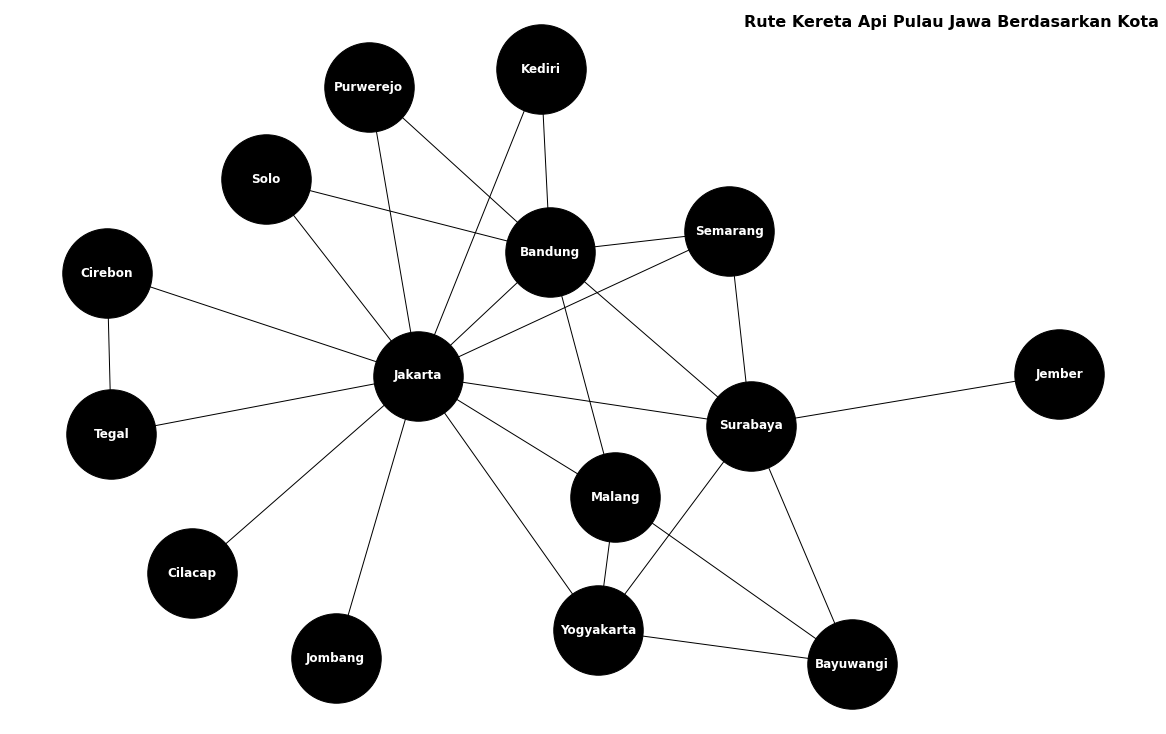

In [237]:
graph_draw_coloring()

### **Betweenness Centrality**

In [238]:
beetwen = nx.betweenness_centrality(G)

df = pd.DataFrame(sorted(beetwen.items(), key=lambda p: p[1], reverse=True), columns=['Kota', 'Nilai Betweenness'])
df

,Kota,Nilai Betweenness
0,Jakarta,0.649817
1,Surabaya,0.200000
2,Bandung,0.106593
3,Malang,0.040659
4,Yogyakarta,0.030403
5,Bayuwangi,0.005495
6,Semarang,0.000000
7,Kediri,0.000000
8,Purwerejo,0.000000
9,Cirebon,0.000000


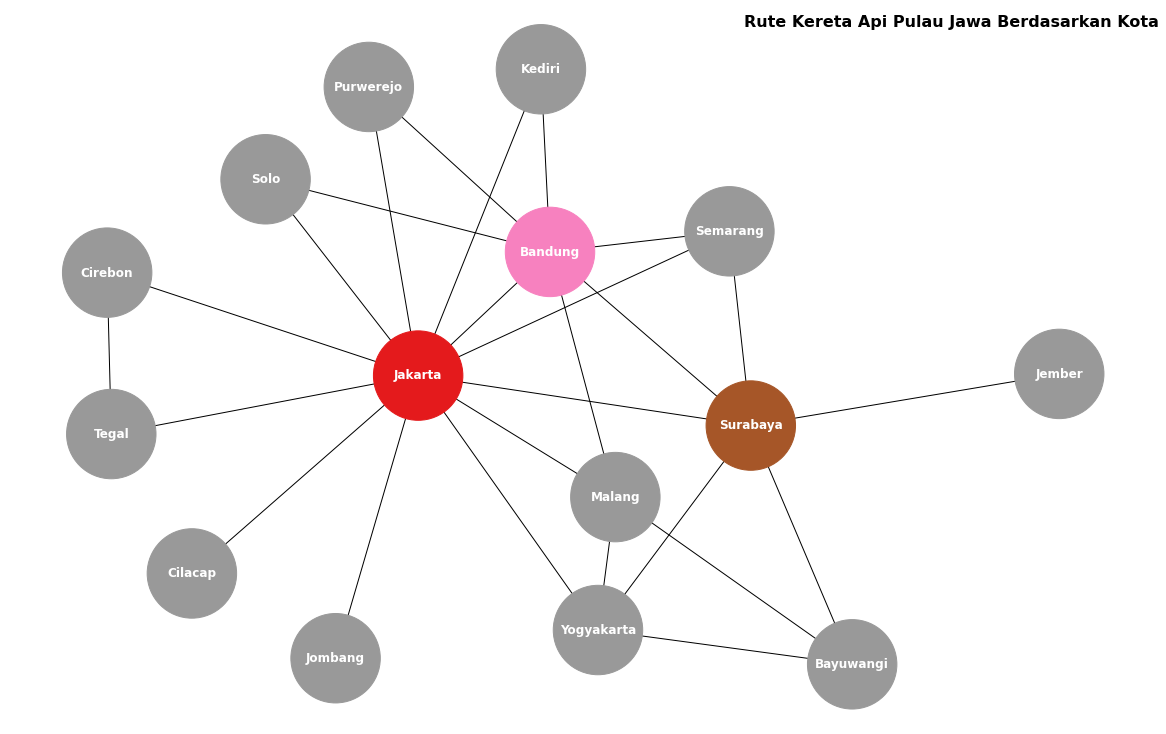

In [239]:
graph_draw_coloring(beetwen)

### **Degree Centrality**

In [240]:
degree = nx.degree_centrality(G)

df = pd.DataFrame(sorted(degree.items(), key=lambda p: p[1], reverse=True), columns=['Kota', 'Nilai Degree'])
df

,Kota,Nilai Degree
0,Jakarta,0.857143
1,Bandung,0.500000
2,Surabaya,0.428571
3,Yogyakarta,0.285714
4,Malang,0.285714
5,Semarang,0.214286
6,Bayuwangi,0.214286
7,Kediri,0.142857
8,Purwerejo,0.142857
9,Cirebon,0.142857


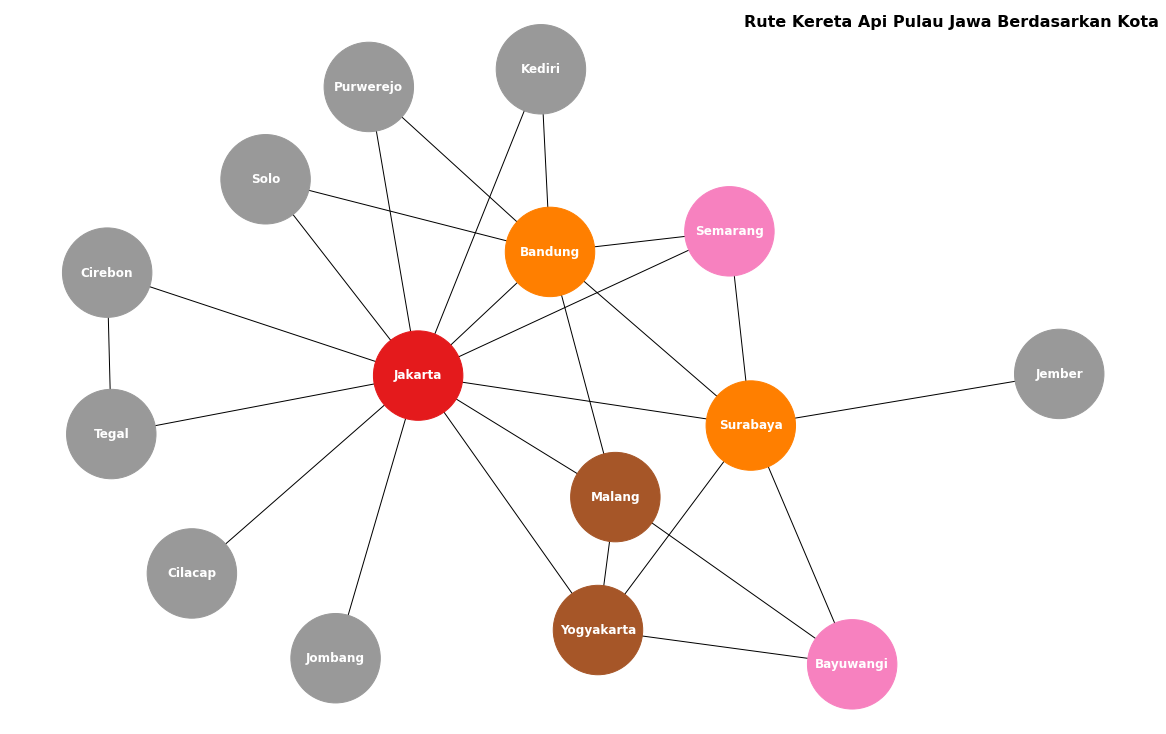

In [241]:
graph_draw_coloring(degree)

### **Kesimpulan**

Berdasarkan nilai dari degree dan betweenness centrality serta hasil pewarnaan graf dapat kita simpulkan kota paling penting adalah Kota Jakarta, disusul oleh Kota Bandung dan Kota Surabaya.